In [13]:
#Je vais cluster par équipes , : x , Nombre de matchs gagnés : y
import pandas as pd
import random
team_home = pd.read_csv('train_home_team_statistics_df.csv')
team_away = pd.read_csv('train_away_team_statistics_df.csv')
#concaténer les deux sans répétition
team = pd.concat([team_home, team_away]).drop_duplicates(keep=False)
#supprimer les valeurs manquantes
team.dropna(inplace=True)
team = team.drop_duplicates(subset='TEAM_NAME', keep='first')
team.head(10)
team

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0
5,5,Liga Portugal,Sporting CP,7.0,6.0,9.0,5.0,10.0,8.0,9.0,...,10.0,8.0,1.0,6.0,4.0,0.0,10.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,6295,Pro League,Anderlecht,6.0,10.0,5.0,7.0,2.0,9.0,9.0,...,1.0,0.0,5.0,0.0,8.0,5.0,6.0,3.0,0.0,4.0
245,245,League One,Sunderland,8.0,3.0,2.0,3.0,7.0,6.0,6.0,...,5.0,8.0,7.0,5.0,5.0,5.0,2.0,5.0,0.0,2.0
3555,3555,Pro League,Gent,10.0,10.0,8.0,10.0,10.0,10.0,10.0,...,2.0,5.0,9.0,10.0,0.0,8.0,4.0,10.0,0.0,0.0
6327,6327,Pro League,OH Leuven,3.0,7.0,3.0,5.0,0.0,3.0,3.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,3.0,2.0


In [14]:
from sklearn.cluster import KMeans
import random
#choisir les colonnes du modèle qui contiennent des données numériques , ce sont les caractéristiques de chaque équipe sauf l'ID.
#Des données home et away
#Qui vont être séparées pour le moment
chosen_features_home = team_home.keys()[3:143]
chosen_features_home = team_home.select_dtypes(include = ["float64"])
chosen_features_home.dropna(inplace=True)
chosen_features_away = team_away.keys()[3:143]
chosen_features_away = team_away.select_dtypes(include = ["float64"])
chosen_features_away.dropna(inplace=True)

In [15]:
#Le clustering va être fait sur les données semblables car elles sont les plus intéressantes
common_features = chosen_features_home.columns.intersection(chosen_features_away.columns)
common_features.dropna()

Index(['TEAM_SHOTS_TOTAL_season_sum', 'TEAM_SHOTS_INSIDEBOX_season_sum',
       'TEAM_SHOTS_OFF_TARGET_season_sum', 'TEAM_SHOTS_ON_TARGET_season_sum',
       'TEAM_SHOTS_OUTSIDEBOX_season_sum', 'TEAM_PASSES_season_sum',
       'TEAM_SUCCESSFUL_PASSES_season_sum', 'TEAM_SAVES_season_sum',
       'TEAM_CORNERS_season_sum', 'TEAM_FOULS_season_sum',
       ...
       'TEAM_YELLOWCARDS_5_last_match_std', 'TEAM_REDCARDS_5_last_match_std',
       'TEAM_OFFSIDES_5_last_match_std', 'TEAM_ATTACKS_5_last_match_std',
       'TEAM_PENALTIES_5_last_match_std',
       'TEAM_SUBSTITUTIONS_5_last_match_std',
       'TEAM_BALL_SAFE_5_last_match_std',
       'TEAM_DANGEROUS_ATTACKS_5_last_match_std',
       'TEAM_INJURIES_5_last_match_std', 'TEAM_GOALS_5_last_match_std'],
      dtype='object', length=140)

In [16]:
#Créer un nouveau data frame avec les données semblables
df_common = pd.DataFrame(team[common_features], columns=common_features)
df_common

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,6.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,8.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,7.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,7.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0
5,7.0,6.0,9.0,5.0,10.0,8.0,9.0,5.0,5.0,2.0,...,10.0,8.0,1.0,6.0,4.0,0.0,10.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,6.0,10.0,5.0,7.0,2.0,9.0,9.0,1.0,10.0,10.0,...,1.0,0.0,5.0,0.0,8.0,5.0,6.0,3.0,0.0,4.0
245,8.0,3.0,2.0,3.0,7.0,6.0,6.0,10.0,8.0,10.0,...,5.0,8.0,7.0,5.0,5.0,5.0,2.0,5.0,0.0,2.0
3555,10.0,10.0,8.0,10.0,10.0,10.0,10.0,7.0,3.0,7.0,...,2.0,5.0,9.0,10.0,0.0,8.0,4.0,10.0,0.0,0.0
6327,3.0,7.0,3.0,5.0,0.0,3.0,3.0,5.0,2.0,10.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,3.0,2.0


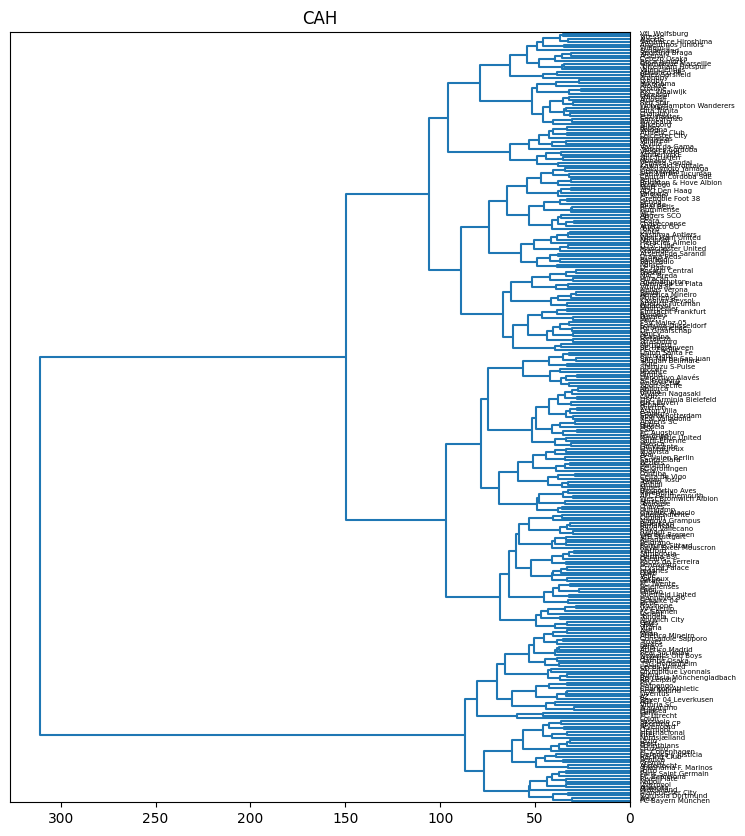

In [17]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pylab import rcParams

# Ajouter le data frame des noms des équipes aux données
df_common.index = team["TEAM_NAME"]


rcParams['figure.figsize'] = 8, 10
#Applicaion de la méthode CAH
Z = linkage(df_common,method='ward',metric='euclidean')
plt.title("CAH")
#Plotter le dendrogram
dendrogram(Z,labels=df_common.index,orientation='left',color_threshold=0)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr_equipes = DecisionTreeRegressor(max_depth=8)
